# Stroke Prediction Dataset

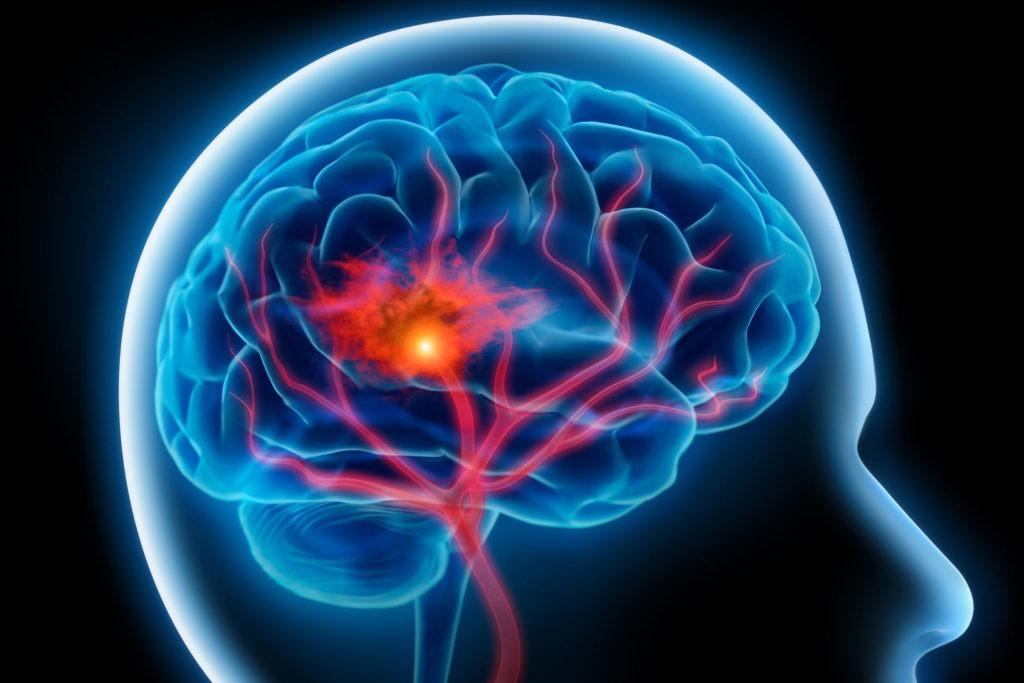

## Analysis pipeline

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


### Read Data

In [2]:
df=pd.read_csv('full_data.csv')
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Explore Data

In [3]:
df.shape

(4981, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
df.isna().sum()


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [9]:
## This data is not normal distributed

### EDA

##### Age

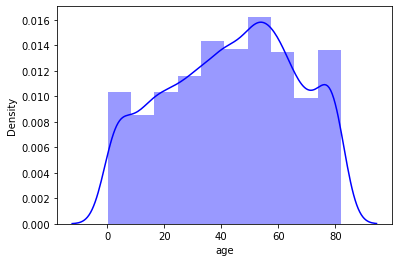

In [10]:
sns.distplot(df["age"],bins=10,color='blue');


*Note: we have ages less than one  "Data may be contain infants"

In [11]:
df['age'].min(),df['age'].max()

(0.08, 82.0)

##### avg_glucose_level

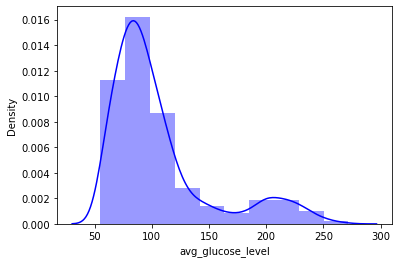

In [12]:
sns.distplot(df["avg_glucose_level"],bins=10,color='blue');

*Note: avg_glucose_level show outliers

##### bmi

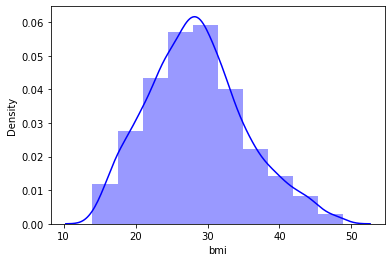

In [13]:
sns.distplot(df["bmi"],bins=10,color='blue');

*Note: bmi show right skewness

In [14]:
###### Stroke ######
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

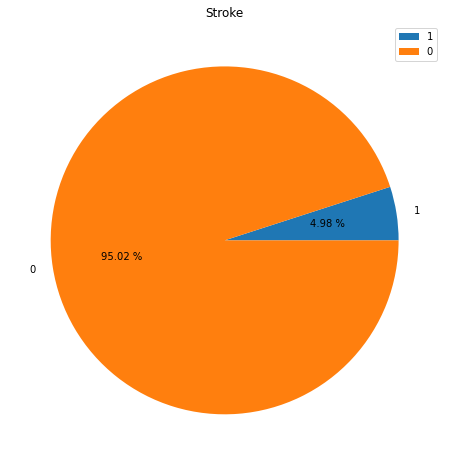

In [15]:

z = df[df["stroke"]==1].count()[0]
a = df[df["stroke"]==0].count()[0]

labels = ["1","0"]
plt.figure(figsize=(8,8))
plt.pie([z,a],labels=labels,autopct = "%.2f %%")
plt.title("Stroke")                          
plt.legend()
plt.show()


In [16]:
###### Residence_type & stroke ######

df["Residence_type"].value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

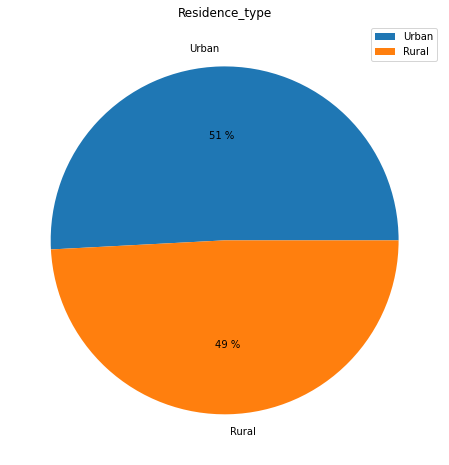

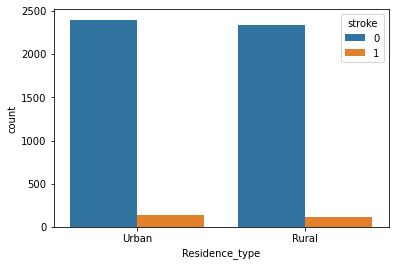

In [17]:
U = df[df["Residence_type"]=="Urban"].count()[0]
R = df[df["Residence_type"]=="Rural"].count()[0]
plt.figure(figsize=(8,8))
plt.pie([U,R],labels=["Urban","Rural"],autopct="%.f %%")
plt.title("Residence_type")
plt.legend()
plt.show()
sns.countplot(x='Residence_type',hue='stroke',data=df)
plt.show()

*Urban more likely to have a stroke than Rural with small different due to Overweight/obesity and low education were associated with increased ischemic stroke in urban areas, while low education was associated with less ischemic stroke in rural areas.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6571368/#:~:text=Overweight%2Fobesity%20and%20low%20education,ischemic%20stroke%20in%20rural%20areas.

In [18]:
##### work_type & stroke #####
df['work_type'].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [19]:
df.groupby('work_type')['stroke'].sum()

work_type
Govt_job          33
Private          148
Self-employed     65
children           2
Name: stroke, dtype: int64

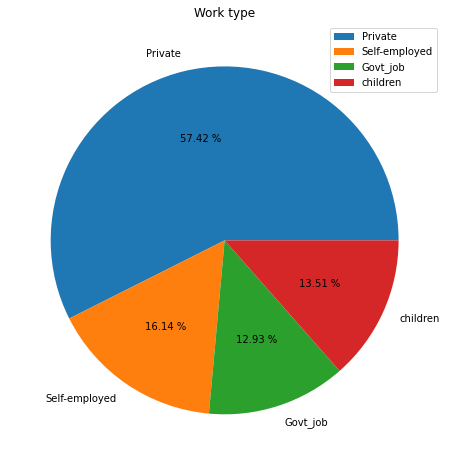

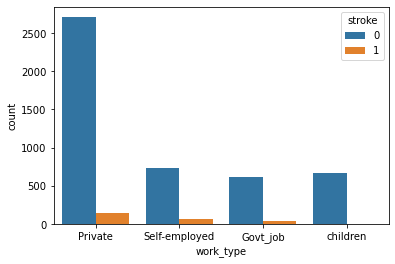

In [20]:

P = df[df["work_type"]=="Private"].count()[0]
S = df[df["work_type"]=="Self-employed"].count()[0]
G = df[df["work_type"]=="Govt_job"].count()[0]
C = df[df["work_type"]=="children"].count()[0]

labels = ["Private","Self-employed","Govt_job","children"]
plt.figure(figsize=(8,8))
plt.pie([P,S,G,C],labels=labels,autopct = "%.2f %%")
plt.title("Work type")                          
plt.legend()
plt.show()
sns.countplot(x='work_type',hue='stroke',data=df)
plt.show()

In [21]:
df.groupby('work_type')['stroke'].value_counts(normalize=True).to_frame()

stroke
work_type     stroke          
Govt_job      0       0.948758
              1       0.051242
Private       0       0.948252
              1       0.051748
Self-employed 0       0.919154
              1       0.080846
children      0       0.997028
              1       0.002972

**Note: People who have work type 'self-employed' are more likely to have a stroke than other

In [22]:
###### smoking_status & stroke ###### 
df['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [23]:
df.groupby('smoking_status')['stroke'].sum()

smoking_status
Unknown            47
formerly smoked    70
never smoked       89
smokes             42
Name: stroke, dtype: int64

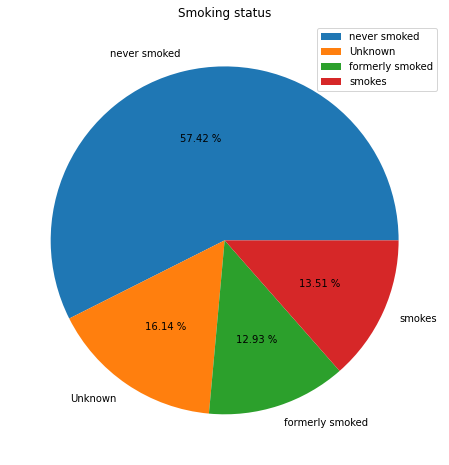

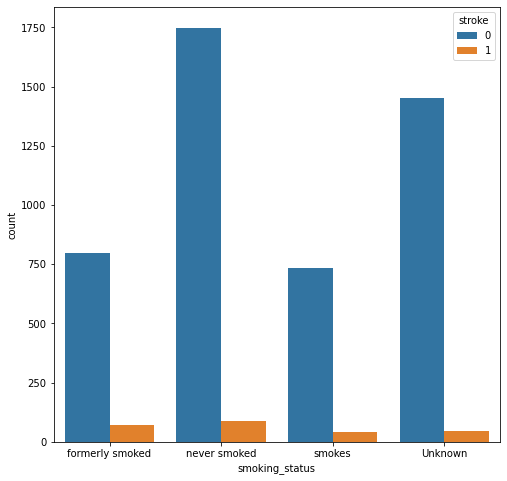

In [24]:
n = df[df["smoking_status"]=="never smoked"].count()[0]
U = df[df["smoking_status"]=="Unknown"].count()[0]
f = df[df["smoking_status"]=="formerly smoked"].count()[0]
s = df[df["smoking_status"]=="smokes"].count()[0]

labels = ["never smoked","Unknown","formerly smoked","smokes"]
plt.figure(figsize=(8,8))
plt.pie([P,S,G,C],labels=labels,autopct = "%.2f %%")
plt.title("Smoking status")                          
plt.legend()
plt.show()

plt.figure(figsize = (8,8))
sns.countplot(x='smoking_status',hue='stroke',data=df)
plt.show()

In [25]:
df.groupby('smoking_status')['stroke'].value_counts(normalize=True).to_frame()

stroke
smoking_status  stroke          
Unknown         0       0.968667
                1       0.031333
formerly smoked 0       0.919262
                1       0.080738
never smoked    0       0.951578
                1       0.048422
smokes          0       0.945876
                1       0.054124

* From the above we noticed that smoked people and formerly smoked people are more likely to have stroke than never smoked because Smoking doubles risk of stroke as it increases blood pressure and reduces oxygen in the blood. High blood pressure is a major risk factor and Tobacco smoke contains over 4000 toxic chemicals which are deposited on lungs or absorbed into the bloodstream damaging blood vessels. 

https://www.quit.org.au/articles/smokesleadtostrokes/#:~:text=Smoking%20doubles%20your%20risk%20of,the%20bloodstream%20damaging%20blood%20vessels.

In [26]:
###### heart_disease & stroke ###### 
df['heart_disease'].value_counts()

0    4706
1     275
Name: heart_disease, dtype: int64

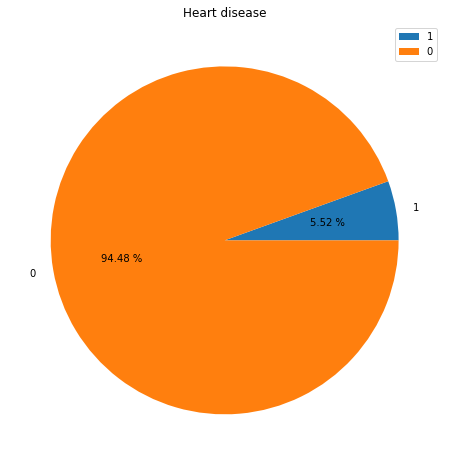

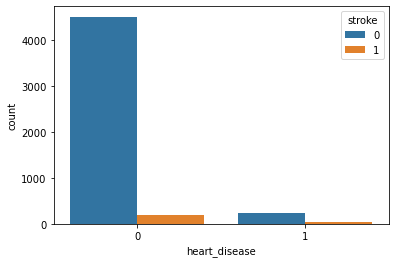

In [27]:
f = df[df["heart_disease"]==1].count()[0]
s = df[df["heart_disease"]==0].count()[0]

labels = ["1","0"]
plt.figure(figsize=(8,8))
plt.pie([f,s],labels=labels,autopct = "%.2f %%")
plt.title("Heart disease")                          
plt.legend()
plt.show()

sns.countplot(x='heart_disease',hue='stroke',data=df)
plt.show()

*People who have heart disease is more likely to have stroke than other due to:

-Heart and blood vessel disease (also called heart disease) includes numerous problems, many of which are related to a process called atherosclerosis.

-Atherosclerosis is a condition that develops when a substance called plaque builds up in the walls of the arteries. This buildup narrows the arteries, making it harder for blood to flow through. If a blood clot forms, it can block the blood flow. This can cause a heart attack or stroke.
https://www.heart.org/en/health-topics/consumer-healthcare/what-is-cardiovascular-disease

In [28]:
###### corelation between features ######
corr=df.corr()

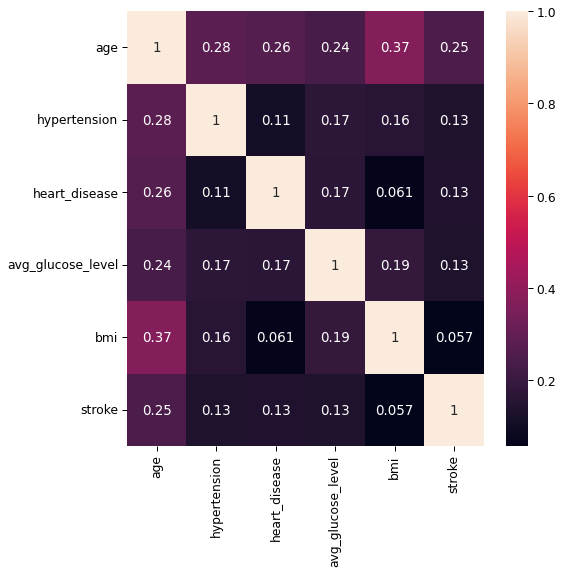

In [29]:
plt.figure(figsize=(8,8))
sns.set_context('paper',font_scale=1.4)
sns.heatmap(corr,annot=True);

*Observation: No strong relation between features

### More analysis according to Age

**from search we found that some measurement like bmi, hypertension and avg_glucose_level have different scales
according to age
So, we take subset from data according to age for more analysis

**Infant (0 to 12 months) and toddler (12 to 36 months), So from 0 to 36 months has different measurement from adult 
https://www.britannica.com/science/infant-and-toddler-development


In [30]:
age_3=df[df['age']<3]
age_3

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
314,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
327,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
385,Female,2.00,0,0,No,children,Rural,92.48,18.0,Unknown,0
502,Female,1.80,0,0,No,children,Urban,58.26,16.5,Unknown,0
504,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4885,Male,0.48,0,0,No,children,Urban,73.02,17.9,Unknown,0
4941,Male,1.88,0,0,No,children,Rural,143.97,19.0,Unknown,0
4945,Male,1.08,0,0,No,children,Rural,74.50,18.8,Unknown,0
4946,Male,1.80,0,0,No,children,Urban,68.80,18.7,Unknown,0


**Regarding avg_glucose_level: 
The blood glucose level (BGL) for a newborn baby
should be above 2.5 mmol/L. However, in the first
couple of hours after birth it may drop lower than this as
your baby adapts to life after birth. If this happens once
just before a feed and your baby is well, this can be
normal.

**By the time your baby is 48 hours old the BGL is
expected to be 3.3 mmol/L or more.
https://www.health.qld.gov.au/__data/assets/pdf_file/0032/881924/c-hypogly.pdf

**Convert from mmol/L to mg/dl by: 
mg/dl = 18 × mmol/l
to adapt to our data

**Normal average for babies = 3.3 * 18 = 59.4 mg/dl

**Regarding BMI: 
We found calculation of BMI for babies till 2 years calculated by percentage according to other babies in same age 
https://sneakpeektest.com/blog/does-baby-bmi-matter/#:~:text=Underweight%20%E2%80%93%20If%20your%20child%20is,is%20above%20the%2095th%20percentile.
According to our data we will handling BMI as the following "Adult measurement"
Normal: BMI > 18.5 and num < 24.9:
underweight BMI < 18.5:
overweight BMI >24.9        

In [31]:
age_3.nunique()

gender                 2
age                   24
hypertension           1
heart_disease          2
ever_married           1
work_type              1
Residence_type         2
avg_glucose_level    164
bmi                   81
smoking_status         1
stroke                 2
dtype: int64

**According to above info we will delete  hypertension, ever_married, work_type , smoking_status

In [32]:
del age_3['hypertension'],age_3['ever_married'],age_3['work_type'],age_3['smoking_status']

#### Univariate analysis

*categorical values

In [33]:
age_3['gender'].value_counts()

Male      89
Female    79
Name: gender, dtype: int64

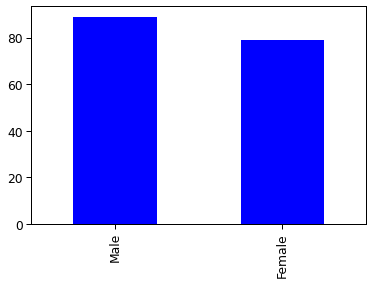

In [34]:
age_3['gender'].value_counts().plot.bar(color ='blue');

###### Small different between Male and Female

In [35]:
age_3['Residence_type'].value_counts()

Rural    86
Urban    82
Name: Residence_type, dtype: int64

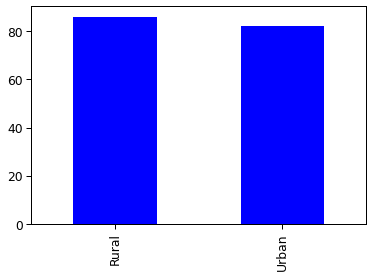

In [36]:
age_3['Residence_type'].value_counts().plot.bar(color ='blue');

###### No big different between Rural & Urban

In [37]:
age_3['stroke'].value_counts()

0    167
1      1
Name: stroke, dtype: int64

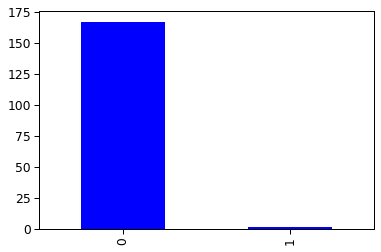

In [38]:
age_3['stroke'].value_counts().plot.bar(color ='blue');


*Numerical Values

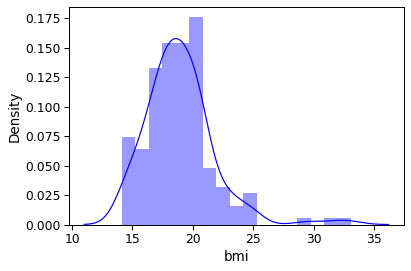

In [39]:
sns.distplot(age_3['bmi'],color="blue");

In [40]:
## Right-skewed in bmi distribution

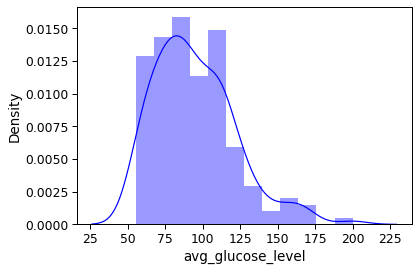

In [41]:
sns.distplot(age_3['avg_glucose_level'],color="blue");

In [42]:
## Right-skewed in avg_glucose_level distribution

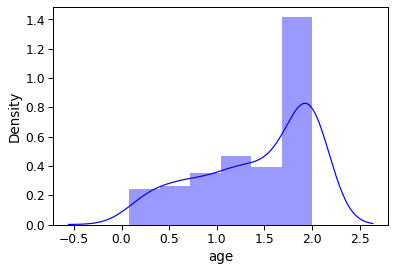

In [43]:
sns.distplot(age_3['age'],color="blue");

In [44]:
## left-skewed in age distribution

***No normal distribution in all Numerical values

#### Bivariate analysis

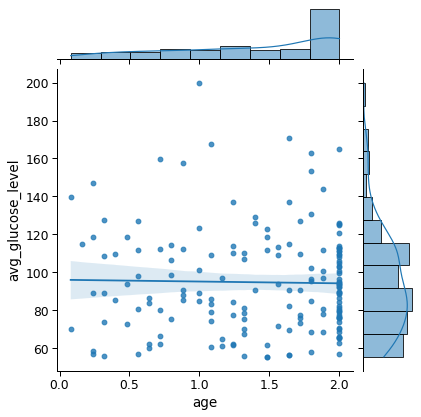

In [45]:
sns.jointplot(x='age',y='avg_glucose_level',data=age_3,kind='reg')
plt.show()

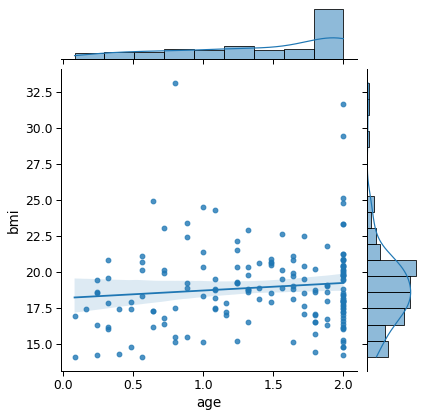

In [46]:
sns.jointplot(x='age',y='bmi',data=age_3,kind='reg')
plt.show()

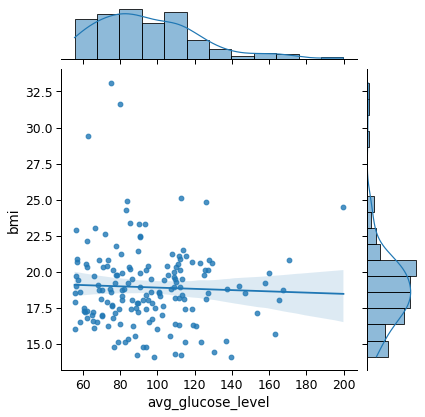

In [47]:
sns.jointplot(x='avg_glucose_level',y='bmi',data=age_3,kind='reg')
plt.show()

#### Multivariate analysis

In [48]:
co_rel=age_3[['gender','age','avg_glucose_level','bmi']]
co_rel

,gender,age,avg_glucose_level,bmi
314,Female,0.64,83.82,24.9
327,Female,0.88,88.11,15.5
385,Female,2.00,92.48,18.0
502,Female,1.80,58.26,16.5
504,Female,0.32,73.71,16.2
...,...,...,...,...
4885,Male,0.48,73.02,17.9
4941,Male,1.88,143.97,19.0
4945,Male,1.08,74.50,18.8
4946,Male,1.80,68.80,18.7


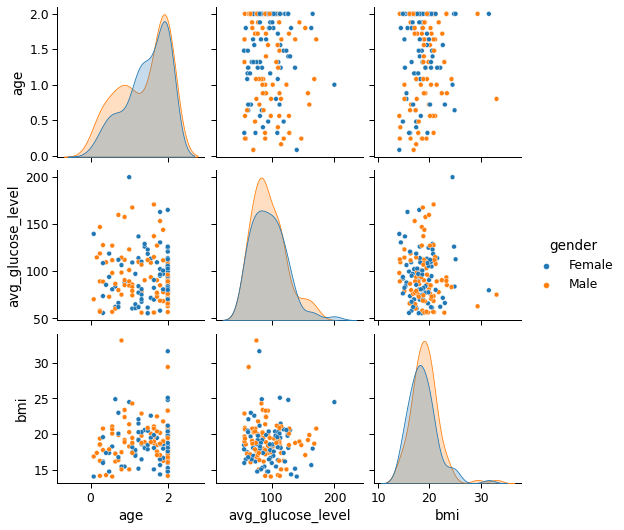

In [49]:
sns.pairplot(co_rel,hue="gender");


In [50]:
## No strong relation between age, avg_glucose_level and bmi

In [51]:
co_rel2=age_3[['age','avg_glucose_level','bmi','stroke']].corr()


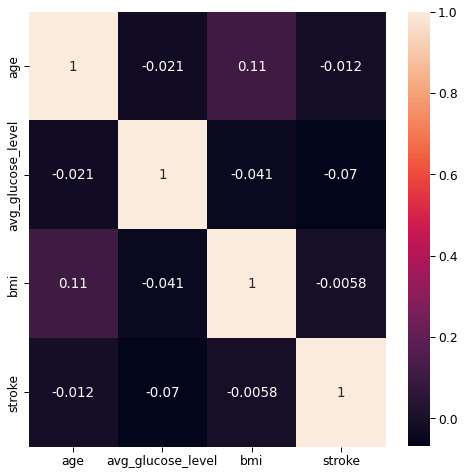

In [52]:
plt.figure(figsize=(8,8))
sns.set_context('paper',font_scale=1.4)
sns.heatmap(co_rel2,annot=True);

* No relation between age, 'avg_glucose_level','bmi' and 'stroke'

In [53]:
def glucose_level(x):
    if x < 59.4:
        return 'Prediabetic'
    elif x > 59.4:
        return "Diabetic"
    else:
        return 'Normal'

In [54]:
age_3['avg_glucose_level']=age_3['avg_glucose_level'].apply(glucose_level)

In [55]:
def bm(x):
    if x > 18.5 and x < 24.9:
        return 'Normal'
    elif x < 18.5:
        return "underweight"
    else:
        return 'overweight'

In [56]:
age_3['bmi']=age_3['bmi'].apply(bm)

In [57]:
age_3.head()

,gender,age,heart_disease,Residence_type,avg_glucose_level,bmi,stroke
314,Female,0.64,0,Urban,Diabetic,overweight,0
327,Female,0.88,0,Rural,Diabetic,underweight,0
385,Female,2.00,0,Rural,Diabetic,underweight,0
502,Female,1.80,0,Urban,Prediabetic,underweight,0
504,Female,0.32,0,Rural,Diabetic,underweight,0


In [58]:
age_3.nunique()

gender                2
age                  24
heart_disease         2
Residence_type        2
avg_glucose_level     2
bmi                   3
stroke                2
dtype: int64

In [59]:
age_3['stroke'].value_counts()

0    167
1      1
Name: stroke, dtype: int64

In [60]:
age_3['heart_disease'].value_counts()

0    167
1      1
Name: heart_disease, dtype: int64

In [61]:
age_3[age_3['stroke']==1]

,gender,age,heart_disease,Residence_type,avg_glucose_level,bmi,stroke
4807,Female,1.32,0,Urban,Diabetic,Normal,1


* From above analysis we noticed that only one stroke case appeared in this range of age

* So, we need more data to be able to apply models for this age 

## Let's make more analysis on the other part of data 'age > 3'

In [62]:
## all age more than 3

new_df=df[df['age']>3]
new_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [63]:
## apply some functions

# 1) bmi
new_df['bmi']=new_df['bmi'].apply(bm)

In [64]:
#2) avg_glucose_level

def glucose(z):
    if z > 140:
        return 'Diabetic'
    elif z > 140 and z > 199:
        return 'Prediabetic'
    else:
        return 'Normal'


In [65]:
new_df['avg_glucose_level']=new_df['avg_glucose_level'].apply(glucose)

In [66]:
new_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,Diabetic,overweight,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,Normal,overweight,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,Diabetic,overweight,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,Diabetic,Normal,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,Diabetic,overweight,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,Normal,overweight,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,Diabetic,overweight,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,Normal,overweight,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,Normal,overweight,smokes,0


In [67]:
###### avg_glucose_level & stroke 
new_df['avg_glucose_level'].value_counts()

Normal      3987
Diabetic     780
Name: avg_glucose_level, dtype: int64

In [68]:
new_df.groupby('avg_glucose_level')['stroke'].sum()

avg_glucose_level
Diabetic     92
Normal      155
Name: stroke, dtype: int64

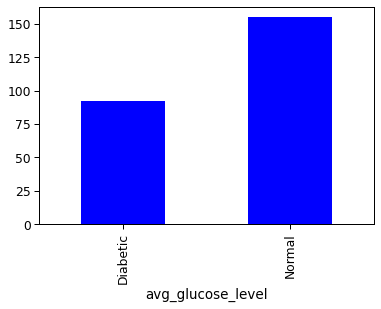

In [69]:
new_df.groupby('avg_glucose_level')['stroke'].sum().plot.bar(color ='blue');

* Diabetic people are more likely to have stroke "around ((92*100)/780) = 11.7% of diabetic people have stroke but only ((155*100)/3987) =3.8% of normal people have stroke" due to Over time, high glucose levels can damage the body’s blood vessels, increasing the chance of stroke.

https://my.clevelandclinic.org/health/diseases/9812-diabetes-and-stroke#:~:text=Your%20body%20can't%20make,Extra%20body%20weight.

In [70]:
###### bmi & stroke ######
new_df['bmi'].value_counts()

overweight     3443
Normal         1107
underweight     217
Name: bmi, dtype: int64

In [71]:
new_df.groupby('bmi')['stroke'].sum()

bmi
Normal          35
overweight     211
underweight      1
Name: stroke, dtype: int64

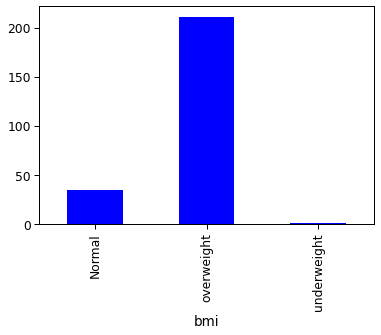

In [72]:
new_df.groupby('bmi')['stroke'].sum().plot.bar(color="blue");

* Overweight people more likely to have stroke than other because  overweight leads to high blood pressure, which is one of the leading causes of stroke.8 Being overweight also leads to metabolic syndrome⁠—characterized by high cholesterol, high triglycerides, and high blood sugar.

https://www.verywellhealth.com/being-overweight-and-stroke-risk-3146345#:~:text=The%20Link%20Between%20Body%20Weight%20and%20Stroke&text=Medical%20scientists%20have%20found%20that,triglycerides%2C%20and%20high%20blood%20sugar.

In [73]:
###### ever_married & stroke ######
new_df['ever_married'].value_counts()

Yes    3280
No     1487
Name: ever_married, dtype: int64

In [74]:
new_df.groupby('ever_married')['stroke'].sum()

ever_married
No      28
Yes    219
Name: stroke, dtype: int64

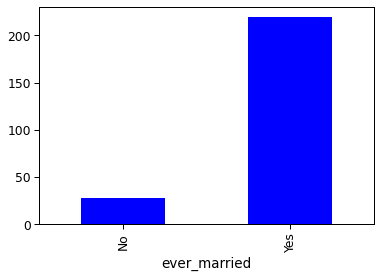

In [75]:
new_df.groupby('ever_married')['stroke'].sum().plot.bar(color='blue');

* Married are more likely to have a stroke than other

### Now we apply Machine Learning Models 

In [76]:
new_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,Diabetic,overweight,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,Normal,overweight,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,Diabetic,overweight,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,Diabetic,Normal,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,Diabetic,overweight,formerly smoked,1


In [77]:
new_df['stroke'].value_counts()

0    4520
1     247
Name: stroke, dtype: int64

** This is inbalanced data. So, we will use SMOTE.

** We evaluate models according to recall to be able to recognize on class 1

In [78]:
## Split data to X, y

X=new_df.drop('stroke',axis=1)
y=new_df['stroke']


In [79]:
## Encoding
X=pd.get_dummies(X,drop_first=True)


In [80]:
# MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
MN=MinMaxScaler()
MN.fit(X)


MinMaxScaler()

In [81]:
X=MN.transform(X)

In [82]:
# Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [83]:
## Handling inbalanced data
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_smote ,y_train_smote=smote.fit_resample(X_train,y_train)

In [84]:
y_train_smote.value_counts()

0    3615
1    3615
Name: stroke, dtype: int64

##### 1-Using Decision Tree
Check if this data need ML or not

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train_smote ,y_train_smote)
y_train_pred=DT.predict(X_train_smote)
print('classification_report for train',classification_report(y_train_pred,y_train_smote))
y_pred=DT.predict(X_test)
print('classification_report for test',classification_report(y_pred,y_test))


classification_report for train               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3652
           1       0.99      1.00      0.99      3578

    accuracy                           0.99      7230
   macro avg       0.99      0.99      0.99      7230
weighted avg       0.99      0.99      0.99      7230

classification_report for test               precision    recall  f1-score   support

           0       0.92      0.96      0.94       869
           1       0.20      0.12      0.15        85

    accuracy                           0.88       954
   macro avg       0.56      0.54      0.54       954
weighted avg       0.85      0.88      0.87       954



****Overfitting. So, this data need ML 

##### 2-Naive Bayes 

In [86]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train_smote ,y_train_smote)
y_train_pred=NB.predict(X_train_smote)
print('classification_report for train',classification_report(y_train_pred,y_train_smote))
y_pred=NB.predict(X_test)
print('classification_report for test',classification_report(y_pred,y_test))

classification_report for train               precision    recall  f1-score   support

           0       0.47      0.90      0.62      1873
           1       0.95      0.64      0.76      5357

    accuracy                           0.71      7230
   macro avg       0.71      0.77      0.69      7230
weighted avg       0.82      0.71      0.73      7230

classification_report for test               precision    recall  f1-score   support

           0       0.47      0.99      0.63       425
           1       0.92      0.09      0.16       529

    accuracy                           0.49       954
   macro avg       0.69      0.54      0.39       954
weighted avg       0.72      0.49      0.37       954



****This mean relation between features are found

##### 3-Using KNeighbors

In [87]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=10)
KN.fit(X_train_smote ,y_train_smote)
y_train_pred=KN.predict(X_train_smote)
print('classification_report',classification_report(y_train_pred,y_train_smote))
y_pred=KN.predict(X_test)
print('classification_report',classification_report(y_pred,y_test))

classification_report               precision    recall  f1-score   support

           0       0.87      0.91      0.89      3457
           1       0.92      0.88      0.90      3773

    accuracy                           0.89      7230
   macro avg       0.89      0.89      0.89      7230
weighted avg       0.90      0.89      0.89      7230

classification_report               precision    recall  f1-score   support

           0       0.84      0.96      0.90       788
           1       0.41      0.12      0.19       166

    accuracy                           0.82       954
   macro avg       0.62      0.54      0.54       954
weighted avg       0.76      0.82      0.77       954



*****This POC "Proof of concept", This data need ML and features have a correlation

##### 4-Using LogisticRegression

classification_report for test               precision    recall  f1-score   support

           0       0.70      0.99      0.82       645
           1       0.84      0.13      0.23       309

    accuracy                           0.71       954
   macro avg       0.77      0.56      0.53       954
weighted avg       0.75      0.71      0.63       954



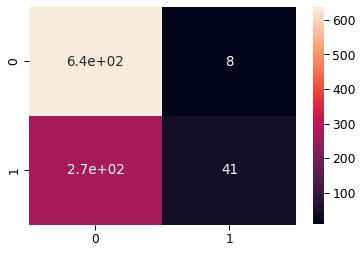

In [88]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train_smote ,y_train_smote)
y_train_pred=LR.predict(X_train_smote)
#print('training accuracy',classification_report(y_train_pred,y_train_smote))
y_pred=LR.predict(X_test)
print('classification_report for test',classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True);

***This mean data not Linear

##### 5-Using RandomForest

classification_report for test               precision    recall  f1-score   support

           0       0.93      0.95      0.94       882
           1       0.14      0.10      0.12        72

    accuracy                           0.89       954
   macro avg       0.54      0.52      0.53       954
weighted avg       0.87      0.89      0.88       954



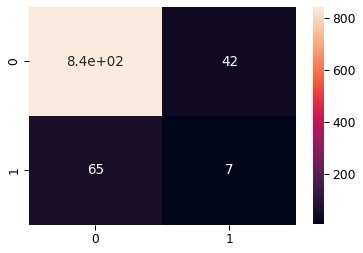

In [89]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=125)
RF.fit(X_train_smote ,y_train_smote)
y_train_pred=RF.predict(X_train_smote)
#print('training accuracy',classification_report(y_train_pred,y_train_smote))
y_pred=RF.predict(X_test)
print('classification_report for test',classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True);

##### 6-Using GradientBoosting

classification_report for train               precision    recall  f1-score   support

           0       0.79      0.98      0.87       735
           1       0.63      0.14      0.23       219

    accuracy                           0.78       954
   macro avg       0.71      0.56      0.55       954
weighted avg       0.76      0.78      0.73       954



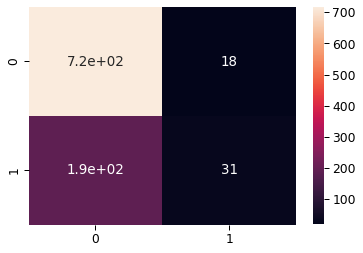

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(n_estimators=50)
GB.fit(X_train_smote ,y_train_smote)
y_train_pred=GB.predict(X_train_smote)
#print('classification_report',classification_report(y_train_pred,y_train_smote))
y_pred=GB.predict(X_test)
print('classification_report for train',classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True);

##### 7-Using xgboost

In [91]:
!pip install xgboost

classification_report               precision    recall  f1-score   support

           0       0.97      0.95      0.96       921
           1       0.10      0.15      0.12        33

    accuracy                           0.92       954
   macro avg       0.54      0.55      0.54       954
weighted avg       0.94      0.92      0.93       954



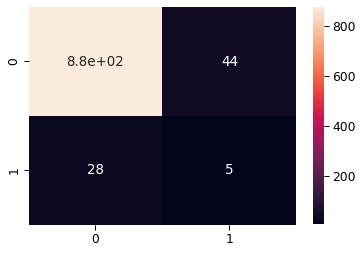

In [143]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50)
xgb.fit(X_train_smote ,y_train_smote)
y_train_pred=xgb.predict(X_train_smote)
#print('classification_report',classification_report(y_train_pred,y_train_smote))
y_pred=xgb.predict(X_test)
print('classification_report',classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True);

##### 8-Using lgbm

In [93]:
!pip install lightgbm

classification_report               precision    recall  f1-score   support

           0       0.97      0.95      0.96       923
           1       0.08      0.13      0.10        31

    accuracy                           0.92       954
   macro avg       0.53      0.54      0.53       954
weighted avg       0.94      0.92      0.93       954



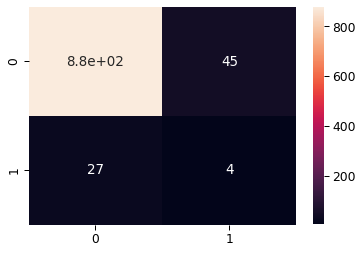

In [94]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=250)
clf.fit(X_train_smote ,y_train_smote)
y_train_pred=clf.predict(X_train_smote)
#print('classification_report',classification_report(y_train_pred,y_train_smote))
y_pred=clf.predict(X_test)
print('classification_report',classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True);

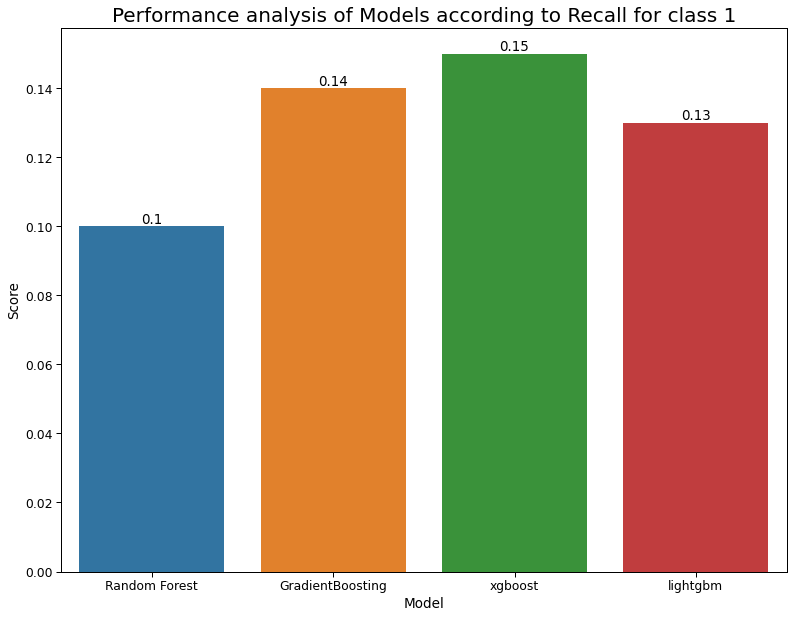

In [187]:
Performance = pd.DataFrame(
    data = {
        'Model': ['Random Forest','GradientBoosting','xgboost','lightgbm'],
        'Score': [0.10,0.14,0.15, 0.13],
        }
)


plt.figure(figsize=(13, 10))
ax = sns.barplot(x="Model", y="Score", data= Performance)
ax.bar_label(ax.containers[0])
plt.title('Performance analysis of Models according to Recall for class 1',fontsize=20)
plt.show()

** Observation
xgboost is the best Model

##### Another Experiment Using RobustScaler

In [96]:
from sklearn.preprocessing import RobustScaler
RS=RobustScaler()
RS.fit(X)

RobustScaler()

In [97]:
X=RS.transform(X)

In [102]:
from sklearn.model_selection import train_test_split
X_train_RS,X_test_RS,y_train_RS,y_test_RS=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_RS_smote ,y_train_RS_smote=smote.fit_resample(X_train_RS,y_train_RS)

##### 1-Using RandomForest

In [166]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=12)
RF.fit(X_train_RS_smote ,y_train_RS_smote)
y_train_RS_pred=RF.predict(X_train_RS_smote)
#print('training accuracy',classification_report(y_train_pred,y_train_smote))
y_pred_RS=RF.predict(X_test_RS)
print('classification_report for test',classification_report(y_pred_RS,y_test_RS))
#sns.heatmap(confusion_matrix(y_pred_RS,y_test_RS),annot=True);

classification_report for test               precision    recall  f1-score   support

           0       0.93      0.95      0.94       885
           1       0.16      0.12      0.14        69

    accuracy                           0.89       954
   macro avg       0.55      0.53      0.54       954
weighted avg       0.88      0.89      0.88       954



##### 2-Using GradientBoosting

classification_report               precision    recall  f1-score   support

           0       0.68      0.99      0.81       622
           1       0.86      0.13      0.22       332

    accuracy                           0.69       954
   macro avg       0.77      0.56      0.51       954
weighted avg       0.74      0.69      0.60       954



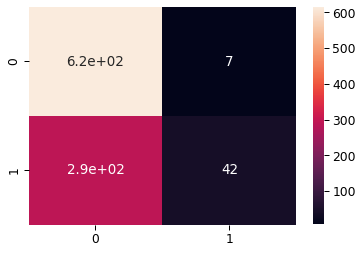

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(n_estimators=30)
GB.fit(X_train_RS_smote ,y_train_RS_smote)
y_train_pred=GB.predict(X_train_RS_smote)
#print('classification_report',classification_report(y_train_pred,y_train_smote))
y_pred_RS=GB.predict(X_test_RS)
print('classification_report',classification_report(y_pred_RS,y_test_RS))
sns.heatmap(confusion_matrix(y_pred_RS,y_test_RS),annot=True);

##### 3-Using xgboost

classification_report               precision    recall  f1-score   support

           0       0.98      0.95      0.97       929
           1       0.10      0.20      0.14        25

    accuracy                           0.93       954
   macro avg       0.54      0.58      0.55       954
weighted avg       0.95      0.93      0.94       954



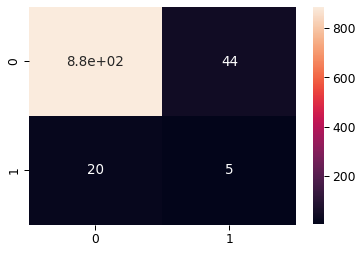

In [134]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_RS_smote ,y_train_RS_smote)
y_train_RS_pred=xgb.predict(X_train_RS_smote)
#print('classification_report',classification_report(y_train_pred,y_train_smote))
y_pred_RS=xgb.predict(X_test_RS)
print('classification_report',classification_report(y_pred_RS,y_test_RS))
sns.heatmap(confusion_matrix(y_pred_RS,y_test_RS),annot=True);

##### 4-Using lgbm

classification_report               precision    recall  f1-score   support

           0       0.97      0.95      0.96       926
           1       0.08      0.14      0.10        28

    accuracy                           0.93       954
   macro avg       0.53      0.55      0.53       954
weighted avg       0.95      0.93      0.94       954



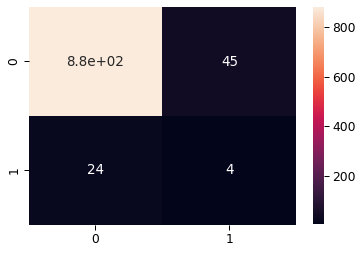

In [154]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=165)
clf.fit(X_train_RS_smote ,y_train_RS_smote)
y_train_RS_pred=clf.predict(X_train_RS_smote)
#print('classification_report',classification_report(y_train_pred,y_train_smote))
y_pred_RS=clf.predict(X_test_RS)
print('classification_report',classification_report(y_pred_RS,y_test_RS))
sns.heatmap(confusion_matrix(y_pred_RS,y_test_RS),annot=True);

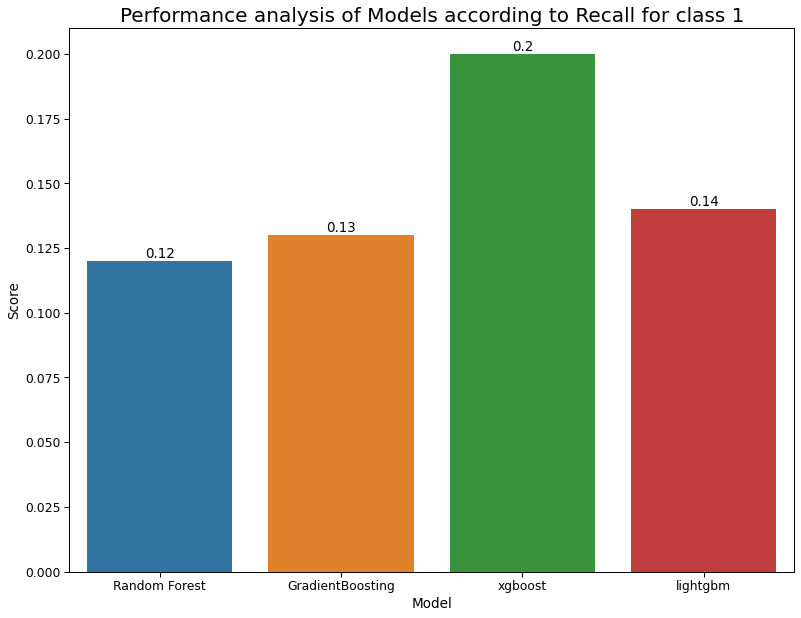

In [186]:
Performance2 = pd.DataFrame(
    data = {
        'Model': ['Random Forest','GradientBoosting','xgboost','lightgbm'],
        'Score': [0.12,0.13,0.20 , 0.14],
        }
)


plt.figure(figsize=(13, 10))
ax = sns.barplot(x="Model", y="Score", data= Performance2)
ax.bar_label(ax.containers[0])
plt.title('Performance analysis of Models according to Recall for class 1',fontsize=20)
plt.show()

**** Observation: by using other scaler "RobustScaler" performance of xgboost become better. But we still need more data and features to able to do best  

In [196]:
## Apply Crossvalidation and GridSearch for GradientBoosting
from sklearn.model_selection import GridSearchCV
param_grid = {

    'max_depth': [4,8,12],
    'max_features': [6,12],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [20,50,100,150]
}
xgb = XGBClassifier()
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 3)
grid_search.fit(X_train_RS_smote ,y_train_RS_smote)


[10:00:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[10:00:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[10:00:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[10:00:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[10:00:46] WARNING: C:/build

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [4, 8, 12], 'max_features': [6, 12],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [20, 50, 100, 150]})

In [197]:
y_pred_RS=grid_search.predict(X_test_RS)
print('classification_report',classification_report(y_pred_RS,y_test_RS))


classification_report               precision    recall  f1-score   support

           0       0.98      0.95      0.97       936
           1       0.06      0.17      0.09        18

    accuracy                           0.94       954
   macro avg       0.52      0.56      0.53       954
weighted avg       0.97      0.94      0.95       954

